**Problems for Quantum Materials Chemistry – Due Friday, March 13th at 4:00 pm**
A 1-time 10 point deduction will be made for problem sets submitted after 4:00 pm on Friday, March 8th.  

Each question is worth 20 points.

You are expected to adhere to the collaboration policy described in the syllabus.  As such, if you discuss strategies for solving problems with other students, you must declare this in the problem set solution you submit.  Sharing solutions with other students does not constitute acceptable collaboration, even if declared, and will be treated as academic dishonesty.


1.  Consider an electron in a 1-D box of length $L=1$ nm that has energy eigenstates given by 
\begin{equation}
\psi_n(x) = \sqrt{2} {\rm sin}(n \pi x)
\end{equation}
when $x$ has units of nanometers.  Now consider that an atomically-precise hammer is used to deform the bottom of the box such that the electron feels an effective potential given by 
\begin{equation}
V(x) = V(x)= -2(x-0.5)^3+0.5.
\end{equation}

    a.  Compute the energy expectation value of an electron described by $\psi_1(x)$ after the box is deformed.

    b.  Explain if you think the original energy eigenstates, $\psi_n(x)$, are stationary states in the deformed box.  
**Solution to 1.a**

**Note** *The length was supposed to be 1 atomic unit, not 1 nanometer!*  

In atomic units, we have
the original particle in a box Hamiltonian as 

$$ \hat{H}_0 = \frac{-\hbar^2}{2m} \frac{d^2}{dx^2} = \frac{-1}{2} \frac{d^2}{dx^2} $$ 
since the electron mass $m$ and reduced Planck's constant $\hbar$ are 1 in atomic units.
The Hamiltonian for the deformed box is therefore

$$ \hat{H} = \frac{-1}{2} \frac{d^2}{dx^2} + V(x) = \hat{H}_0 + V(x) $$

The functions $\psi_n(x) = \sqrt{2} {\rm sin}(n \pi x)$ are eigenfunctions of $\hat{H}_0$:

$$ \hat{H}_0 \psi_n(x) = E_n \psi_n(x) $$

where 

$$ E_n = \frac{\hbar^2 \pi^2 n^2}{2 m L^2} =\frac{\pi^2 n^2}{2}  $$ 

since again, the electron mass $m$, reduced Planck's constant $\hbar$, and the box length $L$ are all 1 in atomic units.

The energy expectation value of $\psi_1(x)$ is therefore
\begin{align}
 \langle E \rangle &= \langle \psi_1(x) | \hat{H} | \psi_1(x) \rangle \\
 &= \langle \psi_1(x) | \hat{H}_0 + V(x) | \psi_1(x) \rangle \\
 &= \langle \psi_1(x) | \hat{H}_0 | \psi_1(x) \rangle + \langle \psi_1(x) | V(x) | \psi_1(x) \rangle \\ 
 &= \langle \psi_1(x) | E_1 | \psi_1(x) \rangle + \langle \psi_1(x) | V(x) | \psi_1(x) \rangle \\
 &= E_1 \langle \psi_1(x) | \psi_1(x) \rangle + \langle \psi_1(x) | V(x) | \psi_1(x) \rangle \\
 &= E_1 + \langle \psi_1(x) | V(x) | \psi_1(x) \rangle \\
 &= \frac{\pi^2}{2} + \langle \psi_1(x) | V(x) | \psi_1(x) \rangle. 
\end{align}
So, we need only to compute the integral 
$$ \langle \psi_1(x) | V(x) | \psi_1(x) \rangle = \int_0^1 \psi_1(x) \left(-2(x-0.5)^3+0.5 \right) \psi_1(x) dx. $$

You may compute this integral in a variety of ways, including using Wolfram Alpha, but I will compute it
numerically using the numpy function `trapz(y, x)` that uses the trapezoid rule to integrate the function
stored in the array `y` along the x-variable stored in `x`.


 energy expectation value is:  5.434802200544679 atomic units
 eigenvalue of psi_1 in the unperturbed box:  4.934802200544679 atomic units


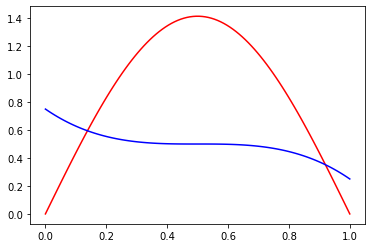

In [42]:
import numpy as np
from matplotlib import pyplot as plt

# length of the box in atomic units
L = 1

# array for x values in atomic units
x = np.linspace(0,L,100)

# array for psi_1
psi_1 = np.sqrt(2/L) * np.sin(np.pi * x / L)

# array for the potential in atomic units
Vx = -2 * (x - 0.5)**3 + 0.5

# let's just plot this stuff to see what it looks like
plt.plot(x, psi_1, 'red')
plt.plot(x, Vx, 'blue')

# the energy expectation value will be the integral from 0 to 1 of psi_1 * Vx * psi_1
integrand = psi_1 * Vx * psi_1
# compute the integral
integral = np.trapz(integrand, x)
# get the expectation value with H_0, which is just the first energy eigenvalue
E1 = np.pi**2 / 2
expectation =  E1 + integral

print(" energy expectation value is: ", expectation, "atomic units")
print(" eigenvalue of psi_1 in the unperturbed box: ", E1, "atomic units")

**solution to 1.b**  
Stationary states must be eigenfunctions of the Hamiltonian.  
We can test $\psi_n(x)$ with the perturbed Hamiltonian to see if it is an eigenstate.
In particular, if it is an eigenstate, then the following will be true:

\begin{align}
\frac{ \hat{H} \psi_n(x)}{\psi_n(x)} &=  \frac{ \left(\hat{H}_0 + V(x) \right)\psi_n(x)}{\psi_n(x)} \\
&= \frac{ \hat{H}_0 \psi_n(x) + V(x) \psi_n(x)}{\psi_n(x)} \\
&= \frac{ E_n \psi_n(x) + V(x) \psi_n(x)}{\psi_n(x)} \\
&= \frac{ \left(E_n + V_n \right)\psi_n(x)}{\psi_n(x)} = E_n + V_n,
\end{align}
where $V_n$ is just a constant.  In other words, we can just see if $\psi_n(x)$ is an eigenfunction of
$V(x)$, and if it is not, then $\psi_n(x)$ cannot be an eigenfunction of $\hat{H}$.

One way to see if this is the case is to just plot $\frac{V(x)\psi_1(x)}{\psi_1(x)}$ and see if it is a constant for all values of $x$ or not.  We see below that it is not, so then we know that $\psi_n(x)$ is not generally
an eigenfunction of $\hat{H}$, which means they are not stationary states.


<ipython-input-43-a5a94178241a>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x, Vx*psi_1/psi_1)


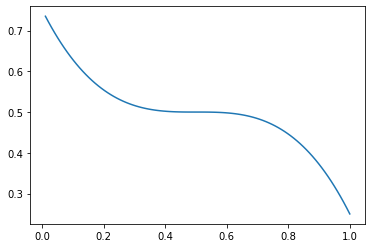

In [43]:
# plot to test of psi_1 is an eigenfunction of Vx
plt.plot(x, Vx*psi_1/psi_1)

2.  Considering the modified box in Question 1, write down the Hamiltonian operator after the box has been modified.  Using this Hamiltonian, use the linear variational method and a basis of the first 10 energy eigenstates of the ordinary particle in a box to estimate the ground state energy of the modified system.

**Solution 2** 
The Hamiltonian of the modified system, in atomic units, is

$$ \hat{H} = \frac{-1}{2} \frac{d^2}{dx^2} -2 \left(x - 0.5\right)^3 + 0.5 $$.
To use the linear variational method, we will build and diagonalize a Hamiltonian matrix with elements defined by

\begin{align}
H_{nm} &= \langle \psi_n(x) | \hat{H} | \psi_m(x) \rangle \\
 &= \langle \psi_n(x) | \hat{H}_0 + V(x) | \psi_m(x) \rangle \\
 &= \langle \psi_n(x) | \hat{H}_0 | \psi_m(x) \rangle + \langle \psi_n(x) | V(x) | \psi_m(x) \rangle \\ 
 &= \langle \psi_n(x) | E_m | \psi_m(x) \rangle + \langle \psi_n(x) | V(x) | \psi_m(x) \rangle \\
 &= E_m \langle \psi_n(x) | \psi_m(x) \rangle + \langle \psi_n(x) | V(x) | \psi_m(x) \rangle \\
 &=  E_m \delta_{nm} + \langle \psi_n(x) | V(x) | \psi_m(x) \rangle.
\end{align}
with $n, m \in [1...10]$.

We will write a python function to compute the matrix elements, create
a numpy array for ${\bf H}$, then loop through
$n$ and $m$ values to compute and store the elements of ${\bf H}$, then
diagonalize it using numpys `eig` function.

**The lowest energy eigenvalue in this basis is found to be 5.434748443809412 atomic units**


In [45]:
### function to compute Hamiltonian matrix elements
### we will pass it the quantum numbers, the
### array of x values, and the potential evaluated along x
def H_nm(n, m, x, potential):
    # compute psi_n
    psi_n = np.sqrt(2) * np.sin(n * np.pi * x)
    # compute psi_m 
    psi_m = np.sqrt(2) * np.sin(m * np.pi * x)
    # compute psi_n * potential * psi_m integrand
    integrand = psi_n * potential * psi_m
    
    # integral over psi_n potential psi_m always contributes to matrix element
    matrix_element = np.trapz(integrand, x)
    
    # if n==m, then E_m also contributes
    if n==m:
        matrix_element += np.pi**2 * m**2 / 2
    
    return matrix_element

### create numpy array for H
H = np.zeros((10,10))

for i in range(1,11):
    for j in range(1,11):
        H[i-1,j-1] = H_nm(i, j, x, Vx)
        
    

### compute eigenvalues and eigenvectors of H_mat
### store eigenvalues to E_opt and eigenvectors to c_opt
### note using np.linalg.eigh() will sort the
### eigenpairs starting from lowest eigenvalue
E_opt, c_opt = np.linalg.eigh(H)


### print lowest eigenvalues corresponding to the 
### variational estimate of the ground state energy
print(E_opt[0])

### print coefficients that define the trial wavefunction with the lowest eigenvalue
### which corresponds to the variational estimate of the ground state wavefunction
print(c_opt[0])

5.434748443809412
[ 9.99998322e-01 -1.81351567e-03  5.15318484e-07 -2.56242489e-04
  1.96268124e-07 -3.27909166e-05  3.05276686e-08 -7.67338646e-06
 -6.23986934e-09 -2.49673048e-06]


3.  Considering the modified box in Question 1, compute the first-order correction to the ground-state energy eigenfunction and the 2nd-order correction to the ground-state energy according to perturbation theory.  The general expression for the first-order correction to the energy eigenfunctions is

\begin{equation}
|\psi_n^{(1)}(x) \rangle = \sum_{m \neq n} \frac{\langle \psi_m^{(0)}(x) | V(x) |\psi_n^{(0)}(x) \rangle }{E_n^{(0)} - E_m^{(0)}} |\psi_m^{(0)}(x) \rangle,
\end{equation}

and the general expression for the second-order correction to the energy eigenvalues is

\begin{equation}
E_n^{(2)} = \sum_{m \neq n} \frac{|\langle \psi_m^{(0)}(x) | V(x) | \psi_n^{(0)}(x) \rangle|^2}{E_n^{(0)} - E_m^{(0)}}.
\end{equation}

Once again, use the first 10 energy eigenstates of the ordinary particle in a box in these expressions and

  a. Plot the first-order corrected ground-state wavefunction against the unperturbed ground-state and the 
  variational ground-state
  
  b.  Compare the second-order corrected ground-state energy against the unperturbed ground-state energy and the variational energy.
  

**Solution to 3.a**
In perturbation theory, the notation $|\psi_m^{(0)}\rangle$ denotes the eigenfunctions of the unperturbed 
system (these are also called the "zero-th order eigenfunctions"), and $E_m^{(0)}$ are the eigenvalues
of the unperturbed system (these are also "zero-th order energies").  Therefore, we can say the following

$$ \hat{H}_0 |\psi_m^{(0)}\rangle = E_m^{(0)}|\psi_m^{(0)}\rangle, $$

where just as before (in atomic units), 

$$  \hat{H}_0 = -\frac{1}{2} \frac{d^2}{dx^2}, $$


$$ E_m^{(0)} = \frac{\pi^2 m^2}{2}, $$

and 

$$ \psi_m^{(0)} = \sqrt{2} {\rm sin}\left(m \pi x\right). $$


This means that all of the integrals required for the pertubative expansion of $|\psi_n^{(1)}(x) \rangle$ (the first-order eigenfunctions) and $E_n^{(2)}$ (the second-order energies) involve functions you already know.  Isn't that exciting??? Yes it is.  In fact, things will work very similarly to our construction of the ${\bf H}$ matrix for problem 2, though only the perturbing potential is involved and the terms are scaled by the inverse of energy differences.  We will create a function that computes either $\frac{\langle \psi_m^{(0)}(x) | V(x) |\psi_n^{(0)}(x) \rangle }{E_n^{(0)} - E_m^{(0)}}$ or $\frac{|\langle \psi_m^{(0)}(x) | V(x) | \psi_n^{(0)}(x) \rangle|^2}{E_n^{(0)} - E_m^{(0)}}$ depending on if we want the first-order eigenfunctions or the second-order energies.

**(a) From the plots below, we see that $\psi_1^{(1)}$ is very small compared to $\psi_1^{(0)}$, which suggests the perturbation is pretty small!**

**(b) From the calculation below, we see that $E_1^{(2)} = -5.375 \cdot 10^{-5}$, and that $E_1^{(0)} + E_1^{(2)} = 4.93474$ atomic units.  We found from the variational method that the ground state energy was $E_{var} = 5.43474$ atomic units.  We should caution that the first-order energy correction should be computed as well for apt comparison between the perturbative and the variational approximation!**

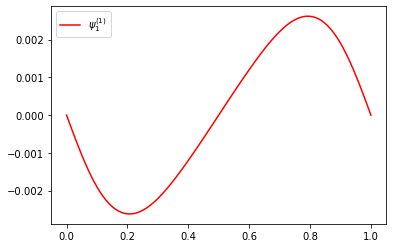

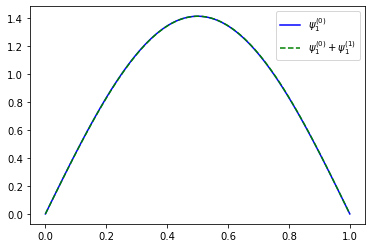

 Second-order energy correction is  -5.3756642426767774e-05
 0th-order energy is 4.934802200544679
 E_1^(0) + E_1^(2) is 4.934748443902253


In [46]:
# function to compute the perturbative term for the
# first-order eigenfunctions (if kind='first') or 
# second-order energy (if kind='second') 
# for state 'n' involving state 'm' with 'potential' evaluated along 'x'
# !!! This will be generic for any state, and to compute the
#     corrections for the ground-state, we will set n = 1 !!!
def perturbation_element(n, m, x, potential, kind):
    
    # psi_n^(0)
    psi_n = np.sqrt(2) * np.sin(n*np.pi*x)
    # psi_m
    psi_m = np.sqrt(2) * np.sin(m*np.pi*x)
    
    # E_n^(0)
    E_n = n**2 * np.pi**2 / 2
    # E_m^(0)
    E_m = m**2 * np.pi**2 / 2
    
    # denominator
    denominator = E_n - E_m
    
    # integrand for numerator
    integrand = psi_m * potential * psi_n
    
    # integral for numerator
    numerator_integral = np.trapz(integrand, x)
    
    # numerator if kind=='first'
    if kind=='first':
        numerator = numerator_integral
    # nuerator if kind=='second'
    elif kind=='second':
        numerator = numerator_integral**2
    # default will be for the first-order eigenfunctions
    else:
        numerator = numerator_integral
    
    return numerator / denominator


# !!! ok let's call this thing to compute the first order correction to the ground-state wavefunction!

# first create an empty array the same length as psi_1
psi_first_order = np.zeros_like(psi_1)

# now loop from m = 2 to 10 and add corrections to this function
for m in range(2, 11):
    # get zeroth order psi_m^(0)
    psi_m_0_order = np.sqrt(2) * np.sin(m * np.pi * x)
    # get weight of psi_m^(0) to the perturbative correction to psi_1^(1)
    weight = perturbation_element(1, m, x, Vx, 'first')
    # update psi_first_order
    psi_first_order += weight * psi_m_0_order
    

plt.plot(x, psi_first_order, 'red', label='$\psi_1^{(1)}$')
plt.legend()
plt.show()

plt.plot(x, psi_1, 'blue', label='$\psi_1^{(0)}$')
plt.plot(x, psi_1+psi_first_order, 'g--', label='$\psi_1^{(0)}+\psi_1^{(1)}$')
plt.legend()
plt.show()


# !!! OK let's now call this thing to compute the second order correction to the ground-state energy!

# initialize the second order energy correction
E_1_second_order = 0

# now loop from m = 2 to 10 and add corrections to the energy
for m in range(2, 11):
    # update energy
    E_1_second_order += perturbation_element(1, m, x, Vx, 'second')

print(" Second-order energy correction is ", E_1_second_order)
print(" 0th-order energy is", np.pi**2/2)
print(" E_1^(0) + E_1^(2) is", np.pi**2/2 + E_1_second_order)

4. Use the following function as a trial wavefunction for the particle-in-a-box groundstate:
\begin{equation}
\phi(x) = c_1 x (L - x) + c_2 x (L-x)^2 + c_3 x^4(L-x) + c_4 x^2(L-x)^2.
\end{equation}
Compare the energy expectation value of $\phi(x)$ to $\psi_1(x)$, the true ground state of the particle in a box of length $L$.  Discuss whether or not this result is consistent with the Variational principle.

**Solution** To compute the energy expectation value, we need to apply the un-perturbed particle in a box Hamiltonian on $\phi(x)$ and then project the result onto $\phi(x)$ and integrate, while also dividing by integral of the square modulus of $\phi(x)$:

\begin{align} 
\langle E \rangle &= \frac{\int_0^L \phi(x) \hat{H} \phi(x) }{\int_0^L \phi(x) \phi(x) dx} \\
\newline 
&= -\frac{\int_0^L \phi(x) \frac{1}{2} \frac{d^2}{dx^2} \phi(x) }{\int_0^L \phi(x) \phi(x) dx} \\
\newline
&= -\frac{1\int_0^L \phi(x)  \phi''(x) }{2 \int_0^L \phi(x) \phi(x) dx}
\end{align}

Of course, we can take the second derivative of $\phi(x)$ with respect to $x$ by hand, but we might as well
use python to do it.  Recall that we can fit a spline to functions in python using 
scipy's `InterpolatedUnivariateSpline` function and then easily generate the derivatives of splines with simple commands.  This is how we will approach this problem, and then we will once again 
take the integrals using numpy's `trapz` function.

 
**Final Answer: Expectation value of this trial function is  5.047467758406873 atomic units
while the True ground state energy is  4.934802200544679 atomic units; this is consistent
with the variational principle which guarantees that the energy expectation value of any trial wavefunction
must be greater than or equal to the true ground state energy.**  


 Expectation value of this trial function is  5.047467758406873 atomic units
 True ground state energy is  4.934802200544679 atomic units


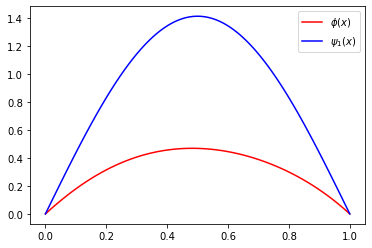

In [52]:
from scipy.interpolate import InterpolatedUnivariateSpline

# compute the phi function and store to an array the same length as x
phi_x = x*(L-x) + x*(L-x)**2 + x**4*(L-x) + x**2*(L-x)**2

# let's plot this to see how it looks!
# plot against psi_1(x) for fun!
plt.plot(x, phi_x, 'red', label='$\phi(x)$')
plt.plot(x, psi_1, 'blue', label='$\psi_1(x)$')
plt.legend()

# fit a spline to phi_x
phi_spline = InterpolatedUnivariateSpline(x, phi_x, k=3)

# take first derivative of the phi spline
phi_p_spline = phi_spline.derivative()

# take the second derivative of the phi spline
phi_pp_spline = phi_p_spline.derivative()

# store phi_prime_prime values to a list the same length as x
phi_pp = phi_pp_spline(x)

# ok let's compute the integrand for the numerator
numerator_integrand = -1 * phi_x * phi_pp
# now the denominator integrand
denominator_integrand = 2 * phi_x * phi_x

# integrate to get numerator and denominator
numerator = np.trapz(numerator_integrand, x)
denominator = np.trapz(denominator_integrand, x)

expectation = numerator / denominator

print(" Expectation value of this trial function is ", expectation, "atomic units")
print(" True ground state energy is ", np.pi**2/2, "atomic units")

5.  The energy expression for second-order Moller-Plesset Perturbation Theory is 
\begin{equation}
E_{MP2} = 2 \sum_{i,j,a,b}^N \frac{\langle ij | V | ab \rangle \langle ab | V | ij \rangle}{\epsilon_i + \epsilon_j - \epsilon_a - \epsilon_b} - \sum_{i,j,a,b}^N \frac{\langle ij | V | ab \rangle \langle ab | V | ji \rangle}{\epsilon_i + \epsilon_j - \epsilon_a - \epsilon_b}
\end{equation}
where $N$ is the number of molecular orbitals, $\epsilon_p$ is the molecular orbital energy
of orbital $p$, and $\langle pq | V | rs \rangle$ is the 2-electron integral
involving orbitals $\phi_p, \phi_q, \phi_r$, and $\phi_s$.  

**Explain how the computational cost of evaluating the MP2 energy scales with the number of molecular orbitals.**  

Because the energy evaluation for MP2 involves sums that run over 4 independent indices, the cost of evaluating the energy scales approximately as the 4th power of the number of molecular orbitals.  More precisely, the sums include two independent indices over the orbitals that are occupied in the Hartree-Fock reference and two independent sums over orbitals that are unoccupied (virtual) in the Hartree-Fock references, which means that the scaling goes as
$N_o^2 \cdot N_v^2$, where $N_o$ indicates the number of occupied orbitals and $N_v$ indicates the number of virtual orbitals.